# Image Fundamentals

Images are basically 2D or 3D arrays where each element in the array represent a pixel value

## Grey scale Image

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

pd.set_option('display.max_colwidth', None)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


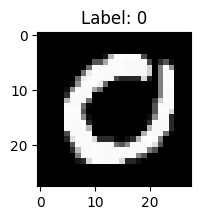

    0   1   2   3   4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24  25  26  27
0    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
1    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
2    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
3    0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0
4    0   0   0   0   0    0    0    0    0    0    0    0   22  183  252  254  252  252  252   76    0    0    0    0    0   0   0   0
5    0   0   0   0   0    0    0    0    0    0   85   85  168  250  250  252  250  250  250  250   71    0   43   85   14   0   0   0
6    0   0   0   0   0    0    0    0    0  107  252  2

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 121

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

## Black and White image

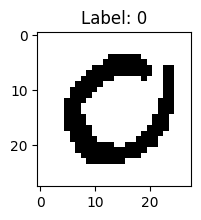

     0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21   22   23   24   25   26   27
0   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
1   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
2   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
3   255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255  255
4   255  255  255  255  255  255  255  255  255  255  255  255  255    0    0    0    0    0    0  255  255  255  255  255  255  255  255  255
5   255  255  255  255  255  255  255  255  255  255  255  255    0    0    0    0    0    0    0    0  255  255  255  255  255  255  255  255

In [ ]:
x_train[i] = np.where(x_train[i] > 128, 0, 255)

plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())

Please submit your feedback via https://futurepicx.com/feedback?id=2487AD91-5429-431C-902C-451AD5055F1A

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [6]:
# Preprocess the data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# x_input = Input(shape=(28, 28, 1))
# x_flatten = Flatten()(x_input)
# x_dense1 = Dense(64, activation='relu')(x_flatten)
# x_dense2 = Dense(32, activation='relu')(x_dense1)
# x_output = Dense(10, activation='softmax')(x_dense2)

In [ ]:
# model = tf.keras.Model(inputs=x_input, outputs=x_output)

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7323 - loss: 5.6203 - val_accuracy: 0.8952 - val_loss: 0.4306
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9031 - loss: 0.3820 - val_accuracy: 0.9173 - val_loss: 0.3299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9242 - loss: 0.2789 - val_accuracy: 0.9269 - val_loss: 0.2628
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9376 - loss: 0.2313 - val_accuracy: 0.9353 - val_loss: 0.2495
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9415 - loss: 0.2147 - val_accuracy: 0.9403 - val_loss: 0.2540
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9515 - loss: 0.1758 - val_accuracy: 0.9500 - val_loss: 0.1969
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9574 - loss: 0.1532 - val_accuracy: 0.9558 - val_loss: 0.1757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9598 - loss: 0.1414 - 

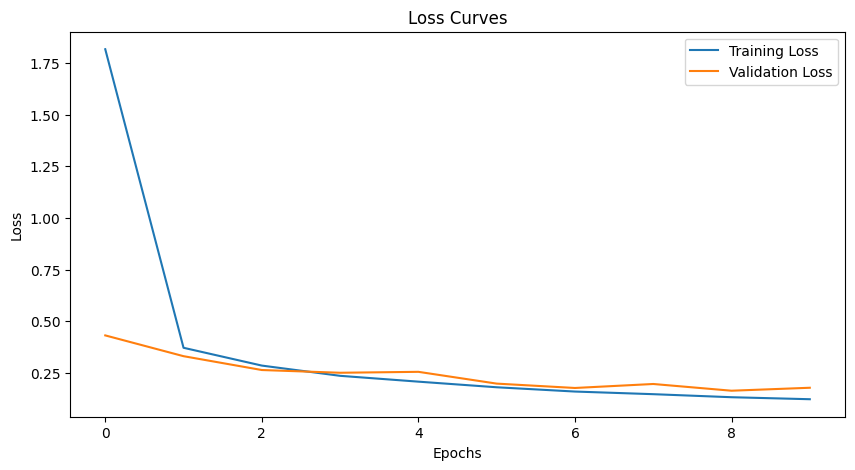

In [13]:
# Plot train and test loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.2020
Test Loss: 0.1768
Test Accuracy: 0.9533


In [14]:
index =121
probs = model.predict(x_test[index].reshape(1,28,28,1))
print(probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
[[3.1972458e-04 3.2308458e-06 6.5441174e-03 1.9196395e-07 3.5600492e-01
  3.7740226e-04 6.3286680e-01 1.6639943e-03 2.1919084e-03 2.7687240e-05]]


In [15]:
np.argmax(probs)

np.int64(6)

In [16]:
model.save('my_model.keras')